In [1]:
import os
import re

from nltk.corpus import europarl_raw
from nltk.corpus import movie_reviews
from nltk.corpus import nps_chat
from nltk.corpus import state_union
from nltk.corpus import twitter_samples
from nltk.corpus import webtext


from nltk.tokenize import word_tokenize

In [24]:
import matplotlib.pyplot as plt

In [2]:
if not os.path.exists('python'):
    os.chdir('..')

In [3]:
def print_methods(obj):
    for method_name in dir(obj):
        print(method_name)

In [4]:
europarl_raw

<module 'nltk.corpus.europarl_raw' from '/home/kjprice/miniconda3/envs/directml/lib/python3.6/site-packages/nltk/corpus/europarl_raw.py'>

In [5]:
# list(movie_reviews.words())

In [6]:
corpora_tokens = [
    list(nps_chat.words()),
    list(europarl_raw.english.words()),
    list(state_union.words()),
    list(webtext.words()),
    list(movie_reviews.words()),
    *twitter_samples.tokenized(),
]

In [7]:
# print_methods(europarl_raw)

In [8]:
# tokenized_twitter = twitter_samples.tokenized()

### Combine all words

In [9]:
all_words = []
for corpus in corpora_tokens:
    for word in corpus:
        all_words.append(word.lower())
len(all_words)

3562033

In [10]:
# all_twitter_words = []
# for sentence in tokenized_twitter:
#     for word in sentence:
#         all_twitter_words.append(word.lower())
# len(all_twitter_words)

### Take words with more than 5 letters

In [11]:
at_least_five_char_words = [word for word in all_words if len(word) >= 5]
len(at_least_five_char_words)

1246401

### Split words up by non a-z characters

In [12]:
def split_words(word):
    words = re.split('[^a-z]*', word)
    return [word for word in words if len(word) >= 5]
split_words("we're going")

/home/kjprice/miniconda3/envs/directml/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


['going']

In [13]:
cleaned_words = []
for raw_word in at_least_five_char_words:
    for cleaned_word in split_words(raw_word):
        cleaned_words.append(cleaned_word)
len(cleaned_words)

1235062

### Take five letter words

In [14]:
five_letter_words = [word for word in cleaned_words if len(word) == 5]
len(five_letter_words)

338798

### Count Words

In [15]:
from collections import Counter
counter = Counter(five_letter_words)

In [16]:
counter

Counter({'gives': 722,
         'women': 690,
         'there': 7454,
         'whats': 67,
         'means': 815,
         'ladis': 1,
         'wanna': 364,
         'didnt': 69,
         'penis': 57,
         'still': 2392,
         'hurry': 47,
         'blunt': 17,
         'chair': 69,
         'about': 6533,
         'being': 2612,
         'often': 623,
         'keeps': 247,
         'place': 1281,
         'wonna': 1,
         'where': 2793,
         'wrong': 834,
         'would': 6369,
         'later': 582,
         'white': 815,
         'sleep': 247,
         'outta': 26,
         'first': 3282,
         'charm': 136,
         'again': 1812,
         'right': 2524,
         'lmaoo': 6,
         'seuss': 2,
         'twice': 192,
         'relax': 20,
         'dirty': 112,
         'pervs': 5,
         'girls': 417,
         'wrote': 822,
         'happy': 592,
         'honey': 100,
         'kinda': 97,
         'jerks': 12,
         'jesus': 142,
         'loves': 170

In [17]:
len(counter)

7827

In [18]:
def load_words_text_file():
    with open('words.txt', 'r') as f:
        return f.read()
words_text = load_words_text_file()

In [19]:
all_words_text = words_text.split('\n')

In [20]:
len(all_words_text)

11225

In [21]:
words_with_frequencies = {}
for word in all_words_text:
    count = 0
    if word in counter:
        count = counter[word]
    words_with_frequencies[word] = count



In [22]:
a = Counter(words_with_frequencies)

In [23]:
words_count_filepath = 'words_counts.txt'
with open(words_count_filepath, 'w') as f:
    f.write('')
with open(words_count_filepath, 'a') as f:
    for word, count in a.most_common():
        f.write(f'{word} {count}\n')

### Inspect Distribution Of Counts

In [44]:
import pandas as pd
word_counts_list = []
for word in words_with_frequencies:
    count = words_with_frequencies[word]
    word_counts_list.append({
        'word': word,
        'counts': count
    })
df = pd.DataFrame(word_counts_list)

In [45]:
df

,word,counts
0,aalii,0
1,aaron,24
2,abaca,0
3,aback,2
4,abaff,0
...,...,...
11220,zudda,0
11221,zygal,0
11222,zygon,0
11223,zymic,0


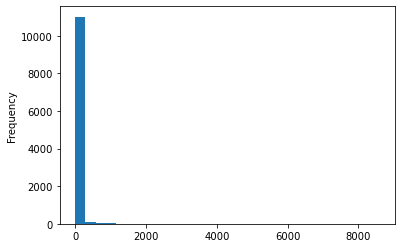

In [46]:
plot_response = df.counts.plot.hist(bins=30)

In [47]:
df.counts.describe()

count    11225.000000
mean        27.392873
std        217.376361
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       8601.000000
Name: counts, dtype: float64

In [50]:
len(df)

11225

In [49]:
df.counts.median()

0.0

(array([1.1161e+04, 3.7000e+01, 1.1000e+01, 8.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  860.1, 1720.2, 2580.3, 3440.4, 4300.5, 5160.6, 6020.7,
        6880.8, 7740.9, 8601. ]),
 <BarContainer object of 10 artists>)

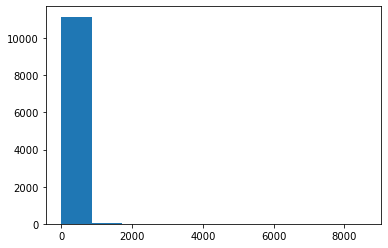

In [48]:
plt.hist(a.values())